In this project, I will explore and analyze the NBA league games.
To do so, I will collect, concat, and clean various datasets in order to get meaningful insights that will help me understand how the league have changed thruoghout the past 16 years. 

In [ ]:
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('chesterish')

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('nba_games.csv')

In [3]:
df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2020-12-19,12000047,Final,1610612753,1610612766,2020,1610612753,120.0,0.433,0.792,...,23.0,50.0,1610612766,117.0,0.444,0.864,0.439,21.0,52.0,1
1,2020-12-19,12000048,Final,1610612764,1610612765,2020,1610612764,99.0,0.427,0.625,...,24.0,45.0,1610612765,96.0,0.402,0.647,0.326,18.0,51.0,1
2,2020-12-19,12000049,Final,1610612763,1610612737,2020,1610612763,116.0,0.400,0.744,...,21.0,43.0,1610612737,117.0,0.422,0.837,0.297,24.0,47.0,0
3,2020-12-18,12000039,Final,1610612754,1610612755,2020,1610612754,107.0,0.371,0.692,...,19.0,45.0,1610612755,113.0,0.533,0.629,0.355,23.0,48.0,0
4,2020-12-18,12000040,Final,1610612761,1610612748,2020,1610612761,105.0,0.380,0.737,...,27.0,37.0,1610612748,117.0,0.534,0.741,0.514,30.0,51.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23520 entries, 0 to 23519
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     23520 non-null  object 
 1   GAME_ID           23520 non-null  int64  
 2   GAME_STATUS_TEXT  23520 non-null  object 
 3   HOME_TEAM_ID      23520 non-null  int64  
 4   VISITOR_TEAM_ID   23520 non-null  int64  
 5   SEASON            23520 non-null  int64  
 6   TEAM_ID_home      23520 non-null  int64  
 7   PTS_home          23421 non-null  float64
 8   FG_PCT_home       23421 non-null  float64
 9   FT_PCT_home       23421 non-null  float64
 10  FG3_PCT_home      23421 non-null  float64
 11  AST_home          23421 non-null  float64
 12  REB_home          23421 non-null  float64
 13  TEAM_ID_away      23520 non-null  int64  
 14  PTS_away          23421 non-null  float64
 15  FG_PCT_away       23421 non-null  float64
 16  FT_PCT_away       23421 non-null  float6

We can see there are quite alot of columns with the same amount of null values. Lets check where exactly this null values are in the columns

<AxesSubplot:>

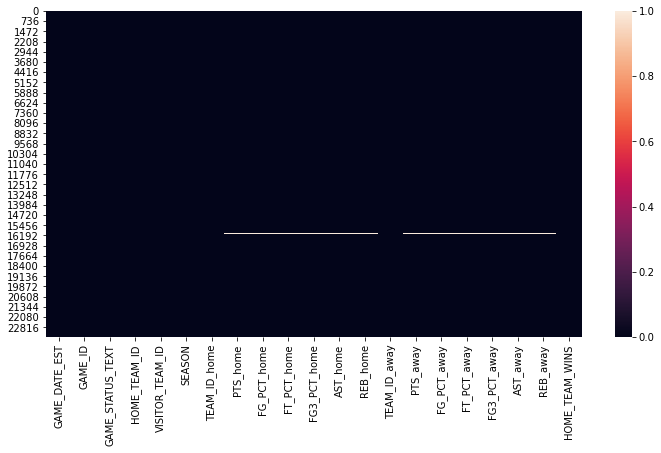

In [5]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(df.isna())

All the null values are in importatnt columns, so I can't analyze anything from these rows. 

Lets see if these null rows are connected somehow by their date. 



In [6]:
df[df.isna().any(axis=1)]['GAME_DATE_EST'].unique()

array(['2003-10-24', '2003-10-23', '2003-10-22', '2003-10-21',
       '2003-10-20', '2003-10-19', '2003-10-18', '2003-10-17',
       '2003-10-16', '2003-10-15', '2003-10-14', '2003-10-13',
       '2003-10-12', '2003-10-11', '2003-10-10', '2003-10-09',
       '2003-10-08', '2003-10-07'], dtype=object)

From a quick check on the internet, the NBA 2003/2004 season began on 28th October, 2003.

Therefore, these games never happend and it must be a mistake in the dataset. Lets remove those null rows. 

In [7]:
df.dropna(inplace=True)

[Text(0.5, 0, 'seasons'), Text(0.5, 1.0, 'season distributions')]

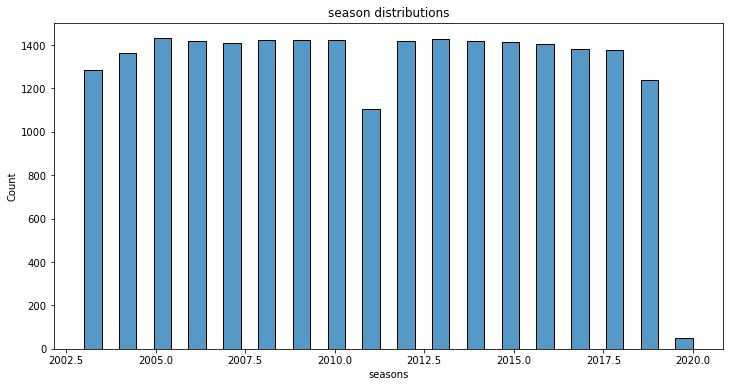

In [8]:
#Lets check whether the data is evenly distributed

fig = plt.figure(figsize=(12, 6))

season_distribution = sns.histplot(df['SEASON'],bins=35, kde=False)
season_distribution.set(xlabel='seasons', title='season distributions')

We can see there is mostly even variance of games documented in the dataset, so there is no worry that will be any bias due to one specific season.

In [9]:
df = df[df['SEASON'] != 2020]

<AxesSubplot:xlabel='HOME_TEAM_WINS', ylabel='count'>

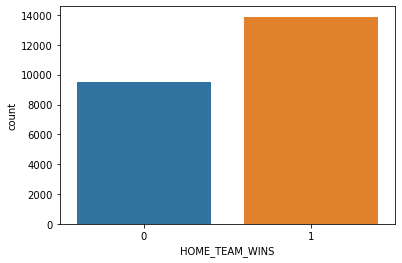

In [10]:
sns.countplot(data=df, x='HOME_TEAM_WINS')

In [11]:
home_seasons_df = df.groupby('SEASON')[['PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home']].mean().reset_index()
home_seasons_df

,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home
0,2003,94.907465,0.445108,0.748642,0.342993,22.056765,43.173406
1,2004,98.604993,0.454632,0.756231,0.354970,21.928781,42.533040
2,2005,98.406425,0.460089,0.744709,0.350063,21.152235,41.799581
3,2006,99.849190,0.462074,0.748553,0.353187,22.004933,41.609584
4,2007,101.273565,0.463230,0.757163,0.359906,22.496811,42.702339
5,2008,100.922807,0.463702,0.766348,0.363791,21.588070,41.960000
6,2009,101.654494,0.465970,0.757674,0.349756,21.884831,42.205758
7,2010,100.756681,0.463857,0.763982,0.355870,21.976090,41.908579
8,2011,97.392210,0.453630,0.753493,0.344514,21.380435,42.860507
9,2012,99.381690,0.458730,0.749131,0.363454,22.605634,42.756338


For me, the first thing that pops out is the fact there is not any major difference between the seasons for most columns.
The exception is column of points scored, lets plot it out. 

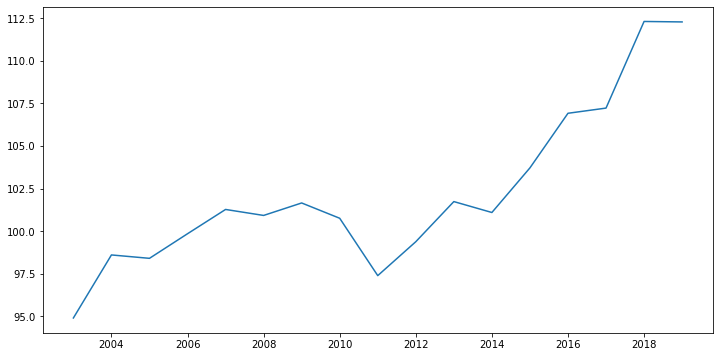

In [12]:
fig = plt.figure(figsize=(12, 6))


plt.plot(home_seasons_df['SEASON'], home_seasons_df['PTS_home'])

Lets see what happens for the away teams. 

In [13]:
away_seasons_df = df.groupby('SEASON')[['PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away']].mean().reset_index()
away_seasons_df

,SEASON,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
0,2003,91.092535,0.431240,0.750990,0.330227,20.262053,41.241058
1,2004,95.381791,0.441678,0.752280,0.346637,20.240088,41.000000
2,2005,95.172486,0.448051,0.742950,0.355920,19.689944,39.972067
3,2006,96.944327,0.450718,0.748125,0.348088,20.223397,40.442565
4,2007,97.549256,0.448358,0.752360,0.352690,20.579022,41.146704
5,2008,97.903860,0.451627,0.767012,0.357941,20.002105,40.530526
6,2009,98.745787,0.456085,0.754971,0.350468,20.259831,41.030899
7,2010,97.384669,0.450444,0.759762,0.348895,20.533052,40.860759
8,2011,94.429348,0.441467,0.751953,0.338460,20.115036,41.421196
9,2012,96.114085,0.445188,0.754877,0.343558,21.218310,41.549296


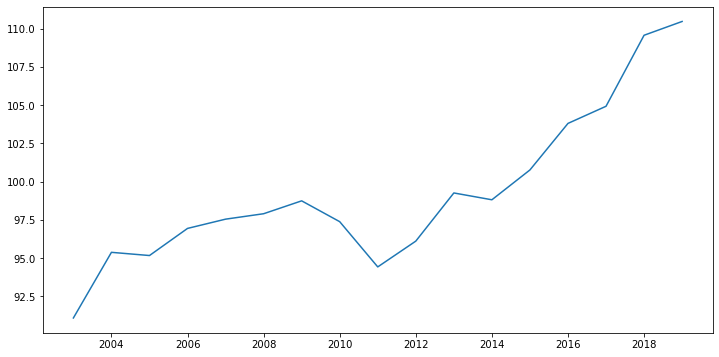

In [14]:
fig = plt.figure(figsize=(12,6))


plt.plot(away_seasons_df['SEASON'],away_seasons_df['PTS_away'])

The same pattren. There is moderate increase in points scored.

i will now conduct some research online to realise if there any explanation for this pattern.
    

Lets see in another dataset that calculates averages of many different parameters for each season.
I will make technical adjustments in order to make this new dataframe readable.

In [22]:
nba_site = pd.read_html('https://www.basketball-reference.com/leagues/NBA_stats_per_game.html')
nba_site_df = nba_site[0]
nba_site_df.columns = nba_site_df.columns.droplevel()
nba_site_df = nba_site_df[nba_site_df['Season'] != 'Season']
nba_site_df.dropna(inplace=True, axis=0, subset=['Season'])

<ipython-input-22-470e1186dc8b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_site_df.dropna(inplace=True, axis=0, subset=['Season'])


In [23]:
def split_string(x):
    x = str(x)
    l = x.split('-')
    return int(l[0]) + 1

In [24]:
#Lets take into consideration only the years we have in the previous DataFrame. 

nba_site_df['Season'] = nba_site_df['Season'].apply(split_string)

<ipython-input-24-982e2091992a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_site_df['Season'] = nba_site_df['Season'].apply(split_string)


In [25]:
nba_site_df = nba_site_df[nba_site_df['Season'].isin(range(2003,2020))]
nba_site_df = nba_site_df.reindex(index=nba_site_df.index[::-1]).reset_index()
nba_site_df = nba_site_df.reset_index()
nba_site_df.drop(['level_0', 'index', 'Rk'], axis=1, inplace=True)
nba_site_df

,Season,Lg,Age,Ht,Wt,G,MP,FG,FGA,3P,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
0,2003,NBA,27.2,6-7,219,1189,242.0,35.7,80.8,5.1,...,95.1,.442,.349,.758,91.0,.474,14.0,28.5,.229,103.6
1,2004,NBA,27.0,6-7,220,1189,241.7,35.0,79.8,5.2,...,93.4,.439,.347,.752,90.1,.471,14.2,28.6,.228,102.9
2,2005,NBA,26.9,6-7,220,1230,241.9,35.9,80.3,5.6,...,97.2,.447,.356,.756,90.9,.482,13.6,28.7,.245,106.1
3,2006,NBA,26.5,6-7,220,1230,242.1,35.8,79.0,5.7,...,97.0,.454,.358,.745,90.5,.490,13.7,27.3,.248,106.2
4,2007,NBA,26.6,6-7,219,1230,242.2,36.5,79.7,6.1,...,98.7,.458,.358,.752,91.9,.496,14.2,27.1,.246,106.5
5,2008,NBA,26.8,6-7,220,1230,241.5,37.3,81.5,6.6,...,99.9,.457,.362,.755,92.4,.497,13.2,26.7,.231,107.5
6,2009,NBA,26.6,6-7,221,1230,241.7,37.1,80.9,6.6,...,100.0,.459,.367,.771,91.7,.500,13.3,26.7,.236,108.3
7,2010,NBA,26.6,6-7,222,1230,241.7,37.7,81.7,6.4,...,100.4,.461,.355,.759,92.7,.501,13.3,26.3,.228,107.6
8,2011,NBA,26.6,6-7,223,1230,241.9,37.2,81.2,6.5,...,99.6,.459,.358,.763,92.1,.498,13.4,26.4,.229,107.3
9,2012,NBA,26.6,6-7,223,990,241.9,36.5,81.4,6.4,...,96.3,.448,.349,.752,91.3,.487,13.8,27.0,.208,104.6


From the research i have conducted in the internet and after and examination of this new DataFrame i've scraped, i can see that above all there is two big factors that correlates perfectly with steep rise of the points in the past 16 seasons. 
They also tend to be considered as the main catalyzes of this in-game increasing points scored phenomenon.

the increasing in three pointer attempts during games is part of  an improved analytical skills revolution of nba teams that took place mostly from the start of last decade.
This made this phnomenon become more noticable in the past few years.

In [26]:
#Lets see it in our eyes
nba_site_df[['Season', 'PTS', 'Pace', '3PA']]

,Season,PTS,Pace,3PA
0,2003,95.1,91.0,14.7
1,2004,93.4,90.1,14.9
2,2005,97.2,90.9,15.8
3,2006,97.0,90.5,16.0
4,2007,98.7,91.9,16.9
5,2008,99.9,92.4,18.1
6,2009,100.0,91.7,18.1
7,2010,100.4,92.7,18.1
8,2011,99.6,92.1,18.0
9,2012,96.3,91.3,18.4


Text(0.5, 1.0, '3PA')

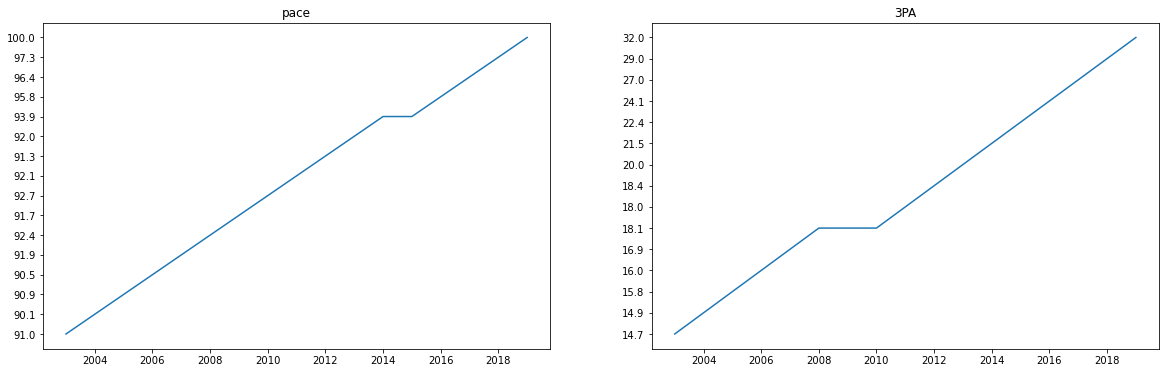

In [32]:
# And now in a graph 

fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))



ax1.plot(nba_site_df['Season'], nba_site_df['Pace'])
ax1.set_title('pace')
ax2.plot(nba_site_df['Season'], nba_site_df['3PA'])
ax2.set_title('3PA')


With this information at the back of our mind lets move back  to explore our original df and see what correlates with winning\losing.

In [27]:
corr_df = df.corr()

<AxesSubplot:>

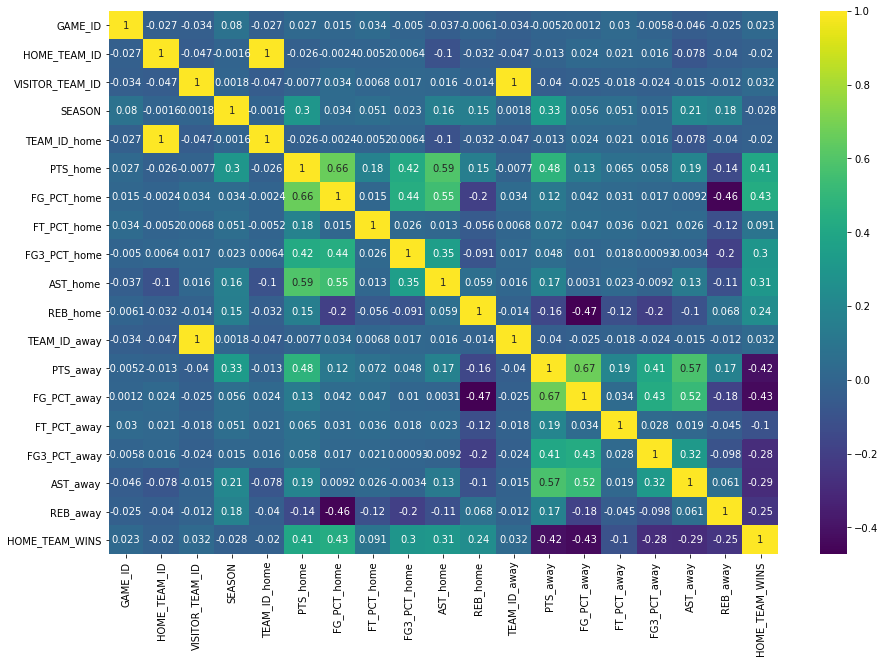

In [28]:
fig = plt.figure(figsize=(15, 10))

sns.heatmap(corr_df, annot=True, cmap='viridis')

We can see that each team in-game paramters are highly correlated which other. 

From examininig the HOME_TEAM_WINS column we can see that the home team: points, field goal percentage, assists and 3PT precantage are the most correlated with the home team win (on the opposite this  parameters in the away team are the most negatively correlated).

As we disscussed the increased three point shooting in the last decade contributed to the increase in points.
The points parameter as field goal percantage very attached to whether team will win or lose as we saw.
Therefore I think it will be interesting to invstigate the 3 point percentage of a team in a given game as a primary factor, due to its effect on points scored and also because it part of the field goal percentage. This means that if the 3 pt percentage high, field goal percentage  will also be high.

<AxesSubplot:xlabel='FG3_PCT_home', ylabel='Count'>

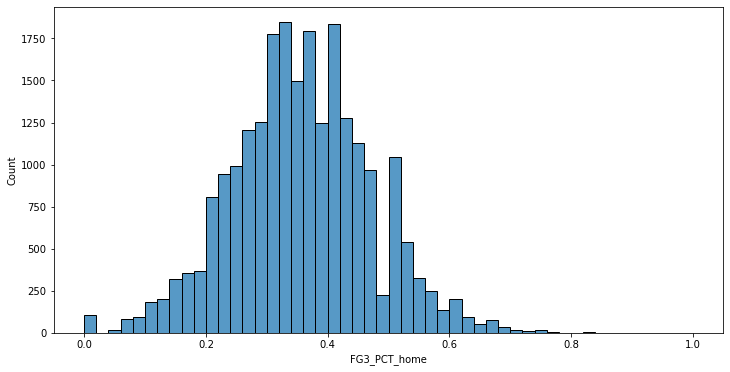

In [29]:
# We are familiar with the mean of 3 pt percentage, lets check the variance of it

fig = plt.figure(figsize=(12, 6))


sns.histplot(data=df, x='FG3_PCT_home', bins=50)


We can see a shape of a normal distribution.

Lets see if there corrleation pattern beatween pts and 3 pt percentage  

<AxesSubplot:xlabel='FG3_PCT_home', ylabel='PTS_home'>

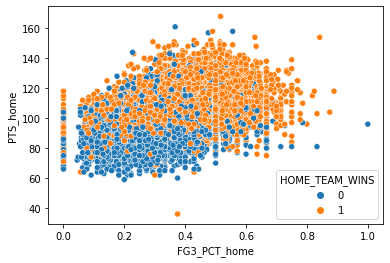

In [30]:
sns.scatterplot(data=df, x='FG3_PCT_home', y='PTS_home', hue='HOME_TEAM_WINS')

There seem to be obvious correletion pattern between home wins and points scored as we  already know.
There also  seem to be correletion pattern in the pts and 3pt percentege. Lets  look at the numbers.

In [31]:
corr_df[['PTS_home', 'HOME_TEAM_WINS']].loc[['PTS_home', 'HOME_TEAM_WINS', 'FG3_PCT_home']]

,PTS_home,HOME_TEAM_WINS
PTS_home,1.000000,0.405232
HOME_TEAM_WINS,0.405232,1.000000
FG3_PCT_home,0.420215,0.296465


We already know the points scored and 3pt% correlation with home win, it seem there is nice correlation between points scored and 3pt percentage too.

In [32]:
#Lets make categories for defifing wheather a game was good 3 pt shooting game

def shooting_game(x):
    if x <= 0.3:
        x = 'bad 3pt shooting game'
    elif x > 0.3 and x <= 0.4:
        x = 'avarge 3pt shooting game'      
    else:
        x = 'good  3pt shooting game'
    return x

In [33]:
df['3_point_shooting_categories'] = df['FG3_PCT_home'].apply(lambda x: shooting_game(x))

In [34]:
df.groupby('3_point_shooting_categories').count()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
3_point_shooting_categories,,,,,,,,,,,,,,,,,,,,,
avarge 3pt shooting game,8594,8594,8594,8594,8594,8594,8594,8594,8594,8594,...,8594,8594,8594,8594,8594,8594,8594,8594,8594,8594
bad 3pt shooting game,7337,7337,7337,7337,7337,7337,7337,7337,7337,7337,...,7337,7337,7337,7337,7337,7337,7337,7337,7337,7337
good 3pt shooting game,7441,7441,7441,7441,7441,7441,7441,7441,7441,7441,...,7441,7441,7441,7441,7441,7441,7441,7441,7441,7441


In [42]:
df.groupby('3_point_shooting_categories')['HOME_TEAM_WINS'].sum()

3_point_shooting_categories
avarge 3pt shooting game    5080
bad 3pt shooting game       3047
good  3pt shooting game     5750
Name: HOME_TEAM_WINS, dtype: int64

<AxesSubplot:xlabel='3_point_shooting_categories', ylabel='HOME_TEAM_WINS'>

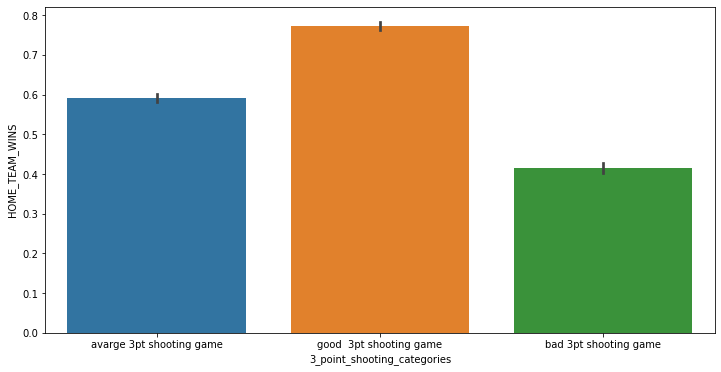

In [35]:
fig = plt.figure(figsize=(12, 6))

sns.barplot(data=df, x='3_point_shooting_categories', y='HOME_TEAM_WINS')

We can see that there more games won by the home team if they shoot the 3 pointer well.

Now lets check the connection between the 3 pt percantages of the rival teams.

We will make new column that classifies whether the home team shot better percantge in 3pt then the visitor team and then look at the connection to the home team winning. 


In [36]:
def home_better_3pt(x, y):
    if x > y:
        return 1
    else:
        return 0

In [37]:
df['home_team_3pt_shooting'] = df.apply(lambda x: home_better_3pt(x['FG3_PCT_home'], x['FG3_PCT_away']), axis=1)

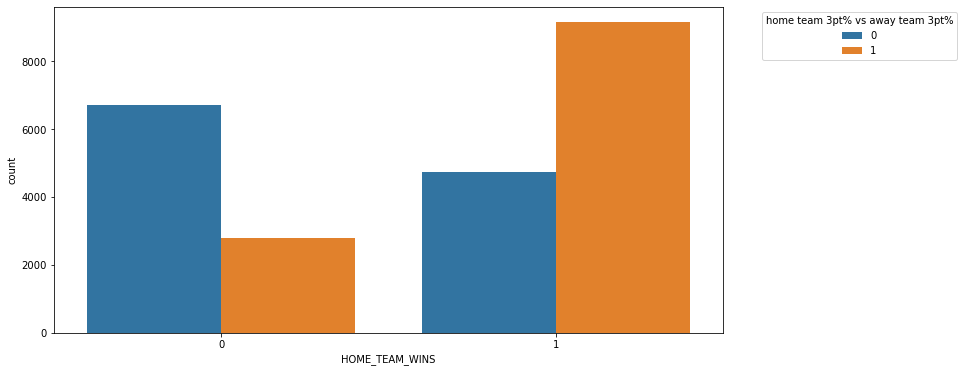

In [38]:
fig= plt.figure(figsize=(12, 6))

sns.countplot(data=df, x='HOME_TEAM_WINS', hue='home_team_3pt_shooting')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = 'home team 3pt% vs away team 3pt%')

I think that it is quite clear that we found some pattern and connection between the  3-point percantage of the home team and their chance to win according to the data. 
Lets move to to making a model that predicts weather team will win or not.
